In [388]:
#import libraries that we will use in the code 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [389]:
#reading the file 
heart = pd.read_csv(r"heart.csv")

We will take a look at our data set before starting data preprocessing

Making some data exploration to understand the char. of dataset

In [390]:
#displaying 10 random columns from the dataset
heart.sample(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
576,62,M,ASY,139,170,0,ST,120,Y,3.0,Flat,1
804,70,M,NAP,160,269,0,Normal,112,Y,2.9,Flat,1
202,42,M,NAP,160,147,0,Normal,146,N,0.0,Up,0
516,68,M,NAP,150,195,1,Normal,132,N,0.0,Flat,1
205,50,M,ASY,150,215,0,Normal,140,Y,0.0,Up,0
890,64,M,TA,170,227,0,LVH,155,N,0.6,Flat,0
775,38,M,TA,120,231,0,Normal,182,Y,3.8,Flat,1
833,54,M,NAP,120,258,0,LVH,147,N,0.4,Flat,0
732,56,F,ASY,200,288,1,LVH,133,Y,4.0,Down,1
766,50,F,NAP,120,219,0,Normal,158,N,1.6,Flat,0


In [391]:
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [392]:
#displaying number of rows and columns of dataset
heart.shape

(918, 12)

In [393]:
#displaying some info about the dataset
print(heart.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


*We can see from the info() that there is no null values in each column

*There is 12 columns and 918 rows

*Type of Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope is string(object) and we will change them into integers later to easily deal with them

*We know that the heart disease in this dataset is heart failure so we will change the name of this column

In [394]:
#Displaying the number of unique values in each column
for col in heart.columns:
  print(f'The unique values in {col} = {len(heart[col].unique())}')

The unique values in Age = 50
The unique values in Sex = 2
The unique values in ChestPainType = 4
The unique values in RestingBP = 67
The unique values in Cholesterol = 222
The unique values in FastingBS = 2
The unique values in RestingECG = 3
The unique values in MaxHR = 119
The unique values in ExerciseAngina = 2
The unique values in Oldpeak = 53
The unique values in ST_Slope = 3
The unique values in HeartDisease = 2


In [395]:
#using describe function to display summary the statistics of the dataset
print(heart.describe())

              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000  


DATA PREPROCESSING

*Note:Heart failure column is the target column we will not use it in data preprocessing

In [396]:
heart.rename(columns={'HeartDisease': 'HeartFailure'}, inplace=True)

1)Data cleaning:

In [397]:
#checking if there is any null values
heart.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartFailure      0
dtype: int64

There is no null values in the data set so there is no need to use heart.dropna() method

In [398]:
#checking if there is any duplicated rows
heart.duplicated().sum()

0

There is no need to use drop_duplicates() as there is no duplicated rows

In [399]:
#categ encoding(Its part from data transformation but we will use it here for detecting outliers)
ExerciseAngina = {"N":0, "Y":1}
heart['ExerciseAngina'] = heart['ExerciseAngina'].map(ExerciseAngina)

ST_Slope = {"Flat":0, "Up":1, "Down":2}
heart['ST_Slope'] = heart['ST_Slope'].map(ST_Slope)

RestingEGG = {"Normal":0, "LVH":1, "ST":2}
heart['RestingECG'] = heart['RestingECG'].map(RestingEGG)

ChestPain = {"ASY":0, "NAP":1, "ATA":2, "TA":3}
heart['ChestPainType'] = heart['ChestPainType'].map(ChestPain)

S = {"M":0, "F":1}
heart['Sex'] = heart['Sex'].map(S)



In [400]:
#We changed all the columns into numbers 
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartFailure    918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.2 KB


In [401]:
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartFailure
0,40,0,2,140,289,0,0,172,0,0.0,1,0
1,49,1,1,160,180,0,0,156,0,1.0,0,1
2,37,0,2,130,283,0,2,98,0,0.0,1,0
3,48,1,0,138,214,0,0,108,1,1.5,0,1
4,54,0,1,150,195,0,0,122,0,0.0,1,0


In [402]:
heart.corr()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartFailure
Age,1.000000,-0.055750,-0.165896,0.254399,-0.095282,0.198039,0.210498,-0.382045,0.215793,0.258612,-0.093424,0.282039
Sex,-0.055750,1.000000,0.168254,-0.005133,0.200092,-0.120076,-0.038320,0.189186,-0.190664,-0.105734,0.066831,-0.305445
ChestPainType,-0.165896,0.168254,1.000000,-0.022168,0.136139,-0.116703,-0.065099,0.343654,-0.416625,-0.245027,0.202675,-0.471354
RestingBP,0.254399,-0.005133,-0.022168,1.000000,0.100893,0.070193,0.117206,-0.112135,0.155101,0.164803,-0.083418,0.107589
Cholesterol,-0.095282,0.200092,0.136139,0.100893,1.000000,-0.260974,-0.042595,0.235792,-0.034166,0.050148,0.007110,-0.232741
FastingBS,0.198039,-0.120076,-0.116703,0.070193,-0.260974,1.000000,0.120774,-0.131438,0.060451,0.052698,-0.043534,0.267291
RestingECG,0.210498,-0.038320,-0.065099,0.117206,-0.042595,0.120774,1.000000,-0.093379,0.098360,0.099935,-0.019403,0.107628
MaxHR,-0.382045,0.189186,0.343654,-0.112135,0.235792,-0.131438,-0.093379,1.000000,-0.370425,-0.160691,0.246927,-0.400421
ExerciseAngina,0.215793,-0.190664,-0.416625,0.155101,-0.034166,0.060451,0.098360,-0.370425,1.000000,0.408752,-0.253181,0.494282
Oldpeak,0.258612,-0.105734,-0.245027,0.164803,0.050148,0.052698,0.099935,-0.160691,0.408752,1.000000,-0.097323,0.403951


In [403]:
#The range of values of Cholesterol ranges from 126 to 564 so there is some wrong data we will remove(inconsistencies)
for x in heart.index:
    if heart.loc[x,"Cholesterol"]>564 or heart.loc[x,"Cholesterol"]<126:
        heart.drop(x,inplace=True)
heart.describe()        

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartFailure
count,738.000000,738.000000,738.000000,738.000000,738.000000,738.000000,738.000000,738.000000,738.000000,738.000000,738.000000,738.000000
mean,52.814363,0.246612,0.841463,133.101626,245.456640,0.165312,0.574526,140.369919,0.382114,0.895799,0.584011,0.474255
std,9.457006,0.431331,0.956625,17.231104,56.396459,0.371714,0.764193,24.596555,0.486234,1.071068,0.597702,0.499675
min,28.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,69.000000,0.000000,-0.100000,0.000000,0.000000
25%,46.000000,0.000000,0.000000,120.000000,208.000000,0.000000,0.000000,122.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,0.000000,1.000000,130.000000,238.000000,0.000000,0.000000,140.000000,0.000000,0.500000,1.000000,0.000000
75%,59.000000,0.000000,2.000000,140.000000,275.000000,0.000000,1.000000,160.000000,1.000000,1.500000,1.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,1.000000


In [404]:
#Checking if there is any outliers in the values of numerical columns

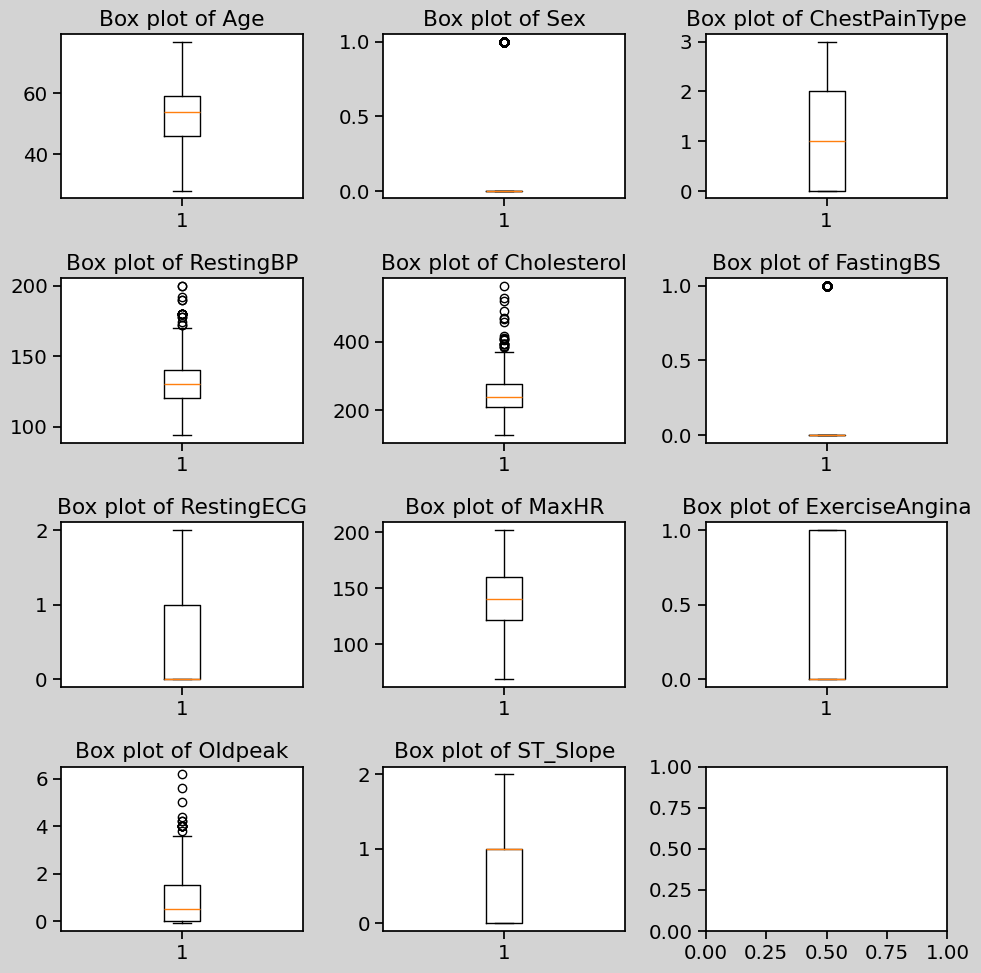

In [405]:
#Displaying box plot of each column 
fig, axs = plt.subplots(4, 3, figsize=(10, 10))
fig.set_facecolor('lightgrey')

axs[0, 0].boxplot(heart['Age'])
axs[0, 0].set_title('Box plot of Age')

axs[0, 1].boxplot(heart['Sex'])
axs[0, 1].set_title('Box plot of Sex')

axs[0, 2].boxplot(heart['ChestPainType'])
axs[0, 2].set_title('Box plot of ChestPainType')

axs[1, 0].boxplot(heart['RestingBP'])
axs[1, 0].set_title('Box plot of RestingBP')

axs[1, 1].boxplot(heart['Cholesterol'])
axs[1, 1].set_title('Box plot of Cholesterol')

axs[1, 2].boxplot(heart['FastingBS'])
axs[1, 2].set_title('Box plot of FastingBS')

axs[2, 0].boxplot(heart['RestingECG'])
axs[2, 0].set_title('Box plot of RestingECG')

axs[2, 1].boxplot(heart['MaxHR'])
axs[2, 1].set_title('Box plot of MaxHR')

axs[2,2].boxplot(heart['ExerciseAngina'])
axs[2,2].set_title('Box plot of ExerciseAngina')

axs[3, 0].boxplot(heart['Oldpeak'])
axs[3, 0].set_title('Box plot of Oldpeak')

axs[3, 1].boxplot(heart['ST_Slope'])
axs[3, 1].set_title('Box plot of ST_Slope')

plt.tight_layout()
plt.show()


There 4 col that dont have outliers

In [406]:
num_cols = ['ChestPainType','RestingBP','Cholesterol','MaxHR','Oldpeak']

for col in num_cols:
    Q1 = heart[col].quantile(0.25)
    Q3 = heart[col].quantile(0.75)
    IQR = Q3 - Q1
    Upper = Q3 + 1.5 * IQR
    Lower = Q1 - 1.5 * IQR

    Upper_outliers = heart[heart[col] > Upper].index
    Lower_outliers = heart[heart[col] < Lower].index

    heart.drop(Upper_outliers, inplace=True)
    heart.drop(Lower_outliers, inplace=True)

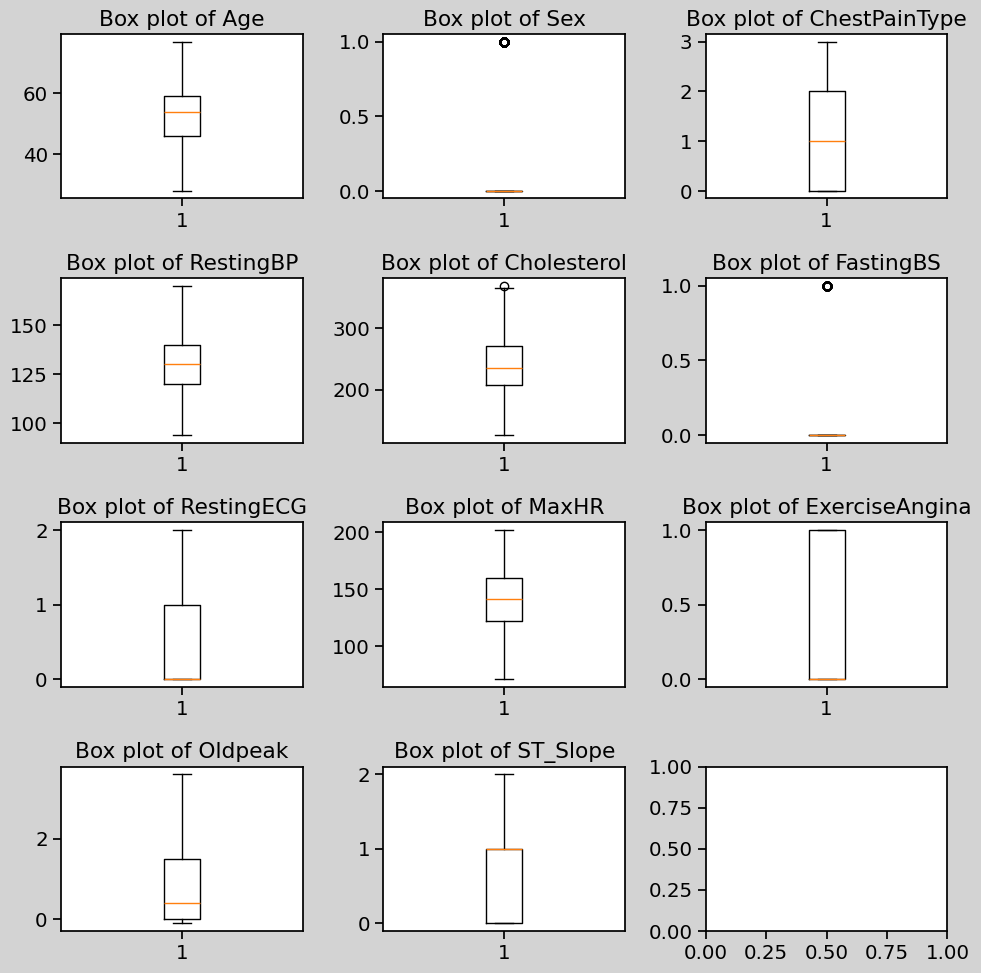

In [407]:
#Displaying box plot of each column after removing outliers
fig, axs = plt.subplots(4, 3, figsize=(10, 10))
fig.set_facecolor('lightgrey')

axs[0, 0].boxplot(heart['Age'])
axs[0, 0].set_title('Box plot of Age')

axs[0, 1].boxplot(heart['Sex'])
axs[0, 1].set_title('Box plot of Sex')

axs[0, 2].boxplot(heart['ChestPainType'])
axs[0, 2].set_title('Box plot of ChestPainType')

axs[1, 0].boxplot(heart['RestingBP'])
axs[1, 0].set_title('Box plot of RestingBP')

axs[1, 1].boxplot(heart['Cholesterol'])
axs[1, 1].set_title('Box plot of Cholesterol')

axs[1, 2].boxplot(heart['FastingBS'])
axs[1, 2].set_title('Box plot of FastingBS')

axs[2, 0].boxplot(heart['RestingECG'])
axs[2, 0].set_title('Box plot of RestingECG')

axs[2, 1].boxplot(heart['MaxHR'])
axs[2, 1].set_title('Box plot of MaxHR')

axs[2,2].boxplot(heart['ExerciseAngina'])
axs[2,2].set_title('Box plot of ExerciseAngina')

axs[3, 0].boxplot(heart['Oldpeak'])
axs[3, 0].set_title('Box plot of Oldpeak')

axs[3, 1].boxplot(heart['ST_Slope'])
axs[3, 1].set_title('Box plot of ST_Slope')

plt.tight_layout()
plt.show()


In [408]:
#We can see after removing outliers number of rows has decreased
heart.shape

(688, 12)

2)Data transformation:

We have already transformed the categ. data into numbers 

We will normalise the values in dataset to use it in Distance-Based Algorithms to ensure accurecy

In [409]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()
cols = heart.columns

# Fit and transform the data
normalized_data = scaler.fit_transform(heart[cols])

# Convert the normalized_data array back to a DataFrame
nor_heart = pd.DataFrame(normalized_data, columns=cols)




In [410]:
heart.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartFailure
count,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000
mean,52.619186,0.239826,0.864826,131.463663,239.515988,0.159884,0.561047,140.736919,0.372093,0.821657,0.575581,0.459302
std,9.485776,0.427288,0.957943,15.275114,46.952449,0.366765,0.758682,24.511453,0.483715,0.955401,0.578697,0.498704
min,28.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,-0.100000,0.000000,0.000000
25%,46.000000,0.000000,0.000000,120.000000,207.000000,0.000000,0.000000,122.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,0.000000,1.000000,130.000000,235.000000,0.000000,0.000000,141.000000,0.000000,0.400000,1.000000,0.000000
75%,59.000000,0.000000,2.000000,140.000000,271.000000,0.000000,1.000000,160.000000,1.000000,1.500000,1.000000,1.000000
max,77.000000,1.000000,3.000000,170.000000,369.000000,1.000000,2.000000,202.000000,1.000000,3.600000,2.000000,1.000000


Exploratory Data Analysis (EDA)

Text(0.5, 1.0, 'Histogram of Age')

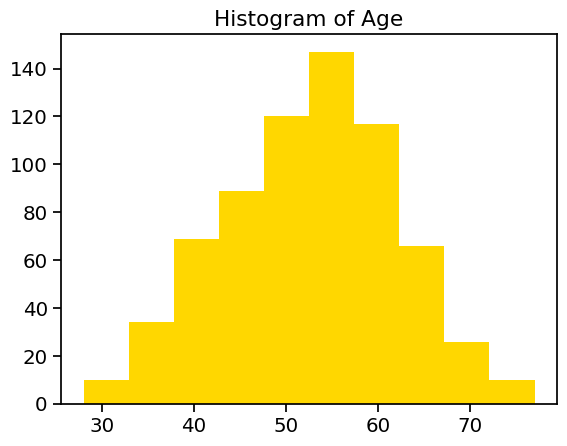

In [411]:
#Representing the histogram of Age and piechart Sex to understand type of the population and distribution

plt.hist(heart['Age'],color = '#FFD700')
plt.title('Histogram of Age')



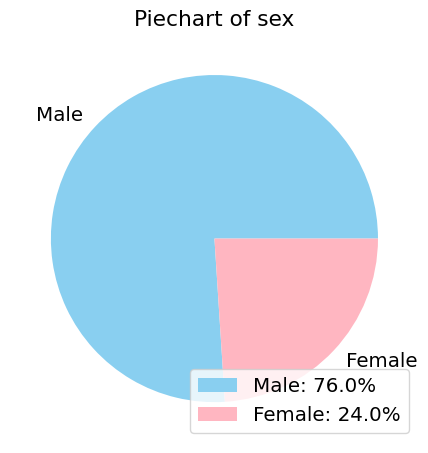

In [412]:
labels = ['Male','Female']
sex_counts = heart['Sex'].value_counts()
percentages = [(count / sex_counts.sum()) * 100 for count in sex_counts]
plt.pie(sex_counts, labels=labels,colors=['#89CFF0', '#FFB6C1'])
plt.title('Piechart of sex')
legend_labels = [f"{label}: {percent:.1f}%" for label, percent in zip(labels, percentages)]
plt.legend(legend_labels, loc='lower right')
plt.tight_layout()
plt.show()

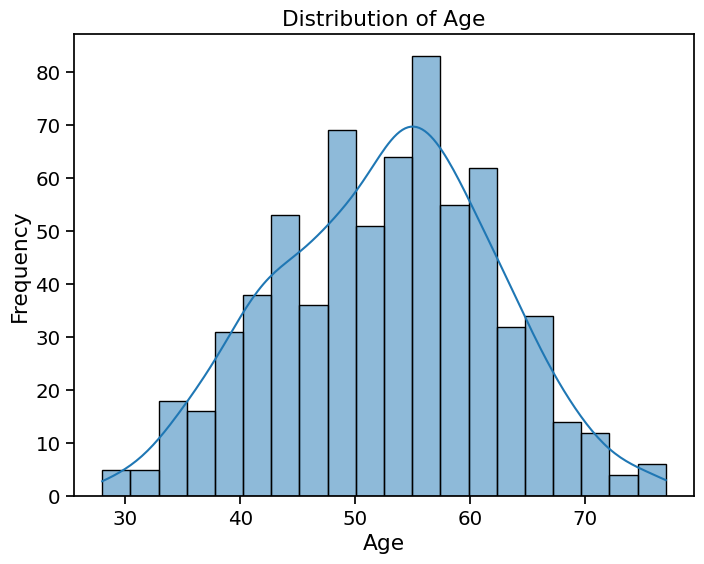

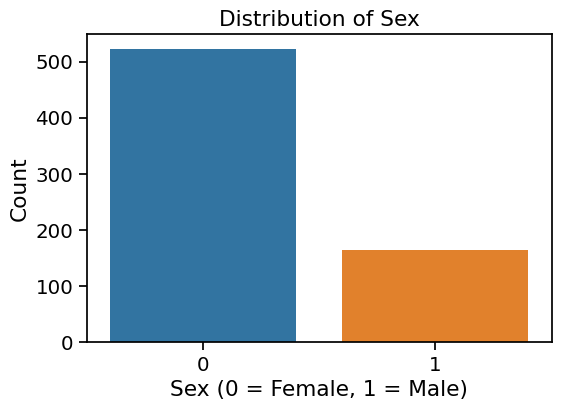

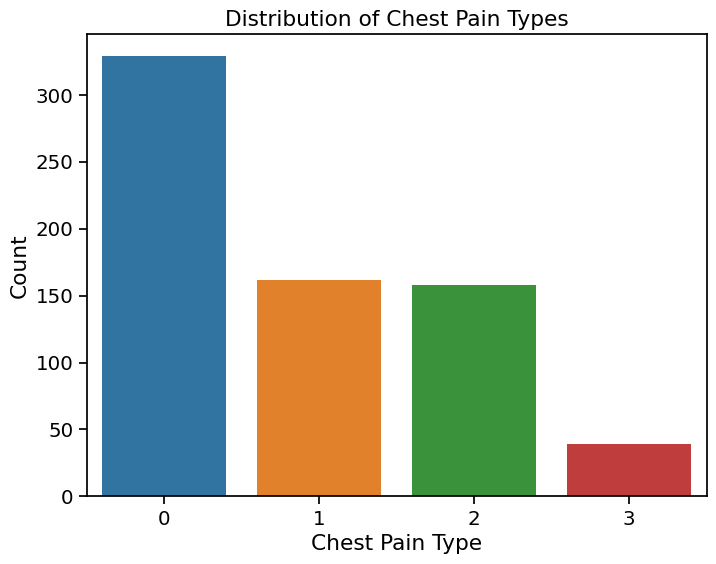

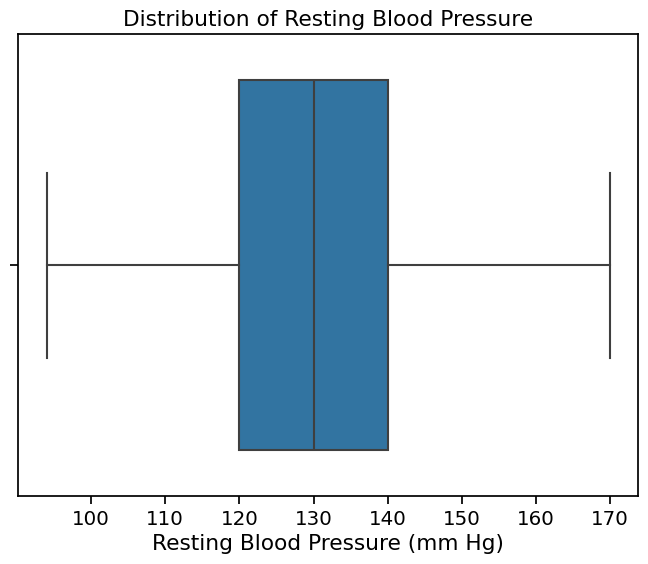

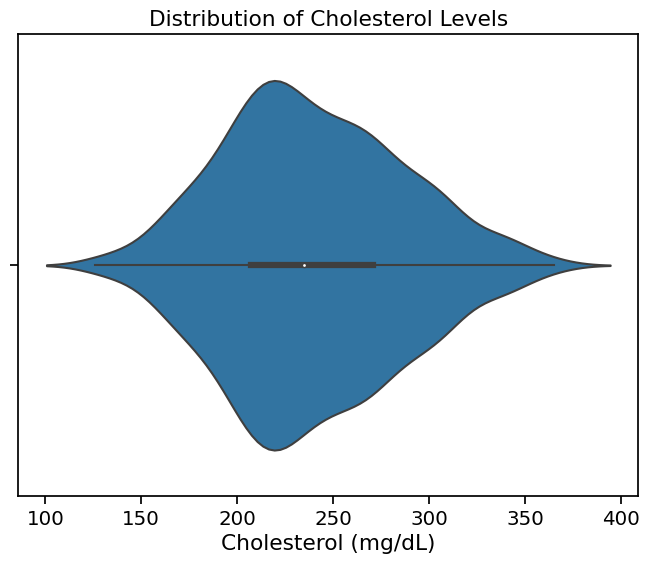

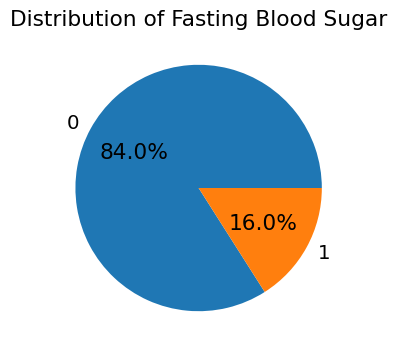

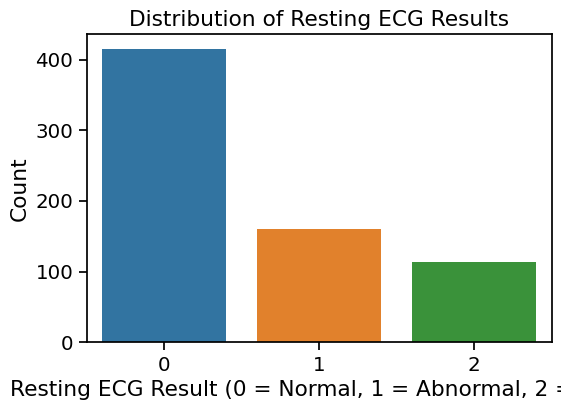

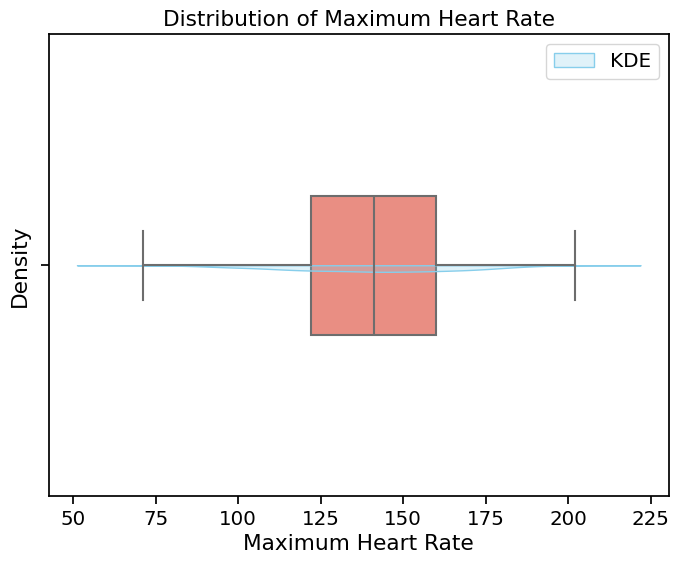

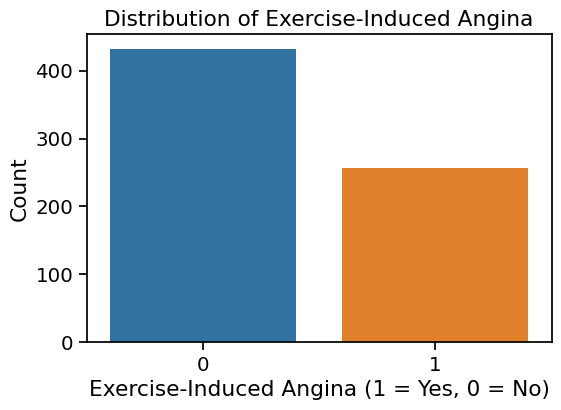

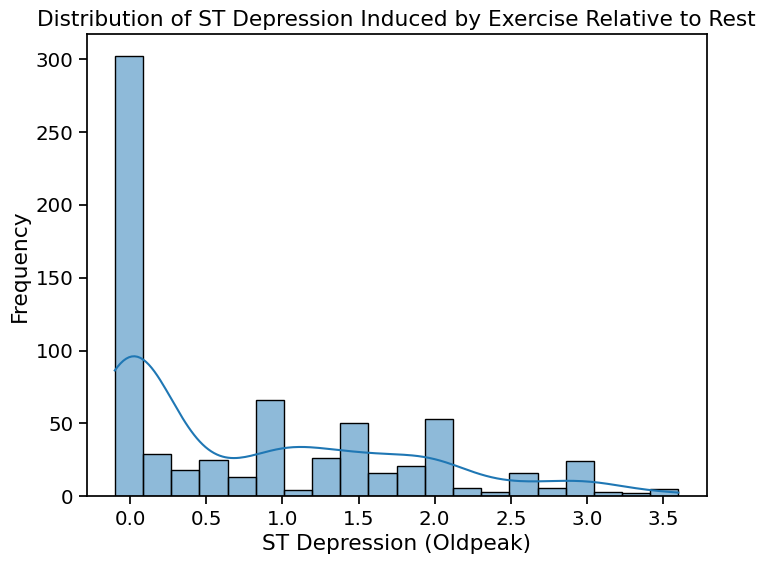

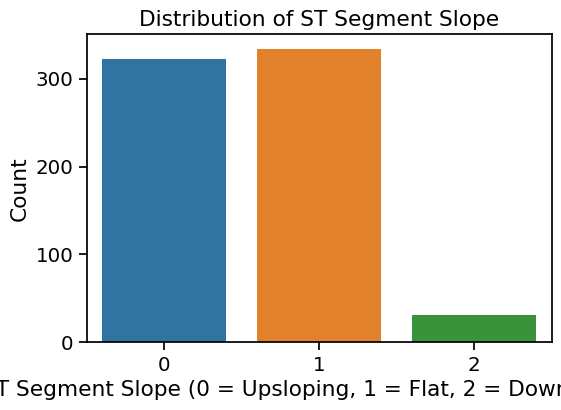

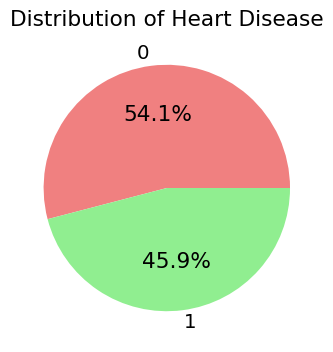

In [413]:

# Set the option to treat infinite values as NaN
with pd.option_context('mode.use_inf_as_na', True):
    
    # 1. Age (Continuous - Histogram and KDE)
    plt.figure(figsize=(8, 6))
    sns.histplot(heart["Age"], bins=20, kde=True)
    plt.title("Distribution of Age")
    plt.xlabel("Age")
    plt.ylabel("Frequency")
    plt.show()
    # Age distribution is slightly right-skewed, with most patients in the 40-70 age range.

    # 2. Sex (Categorical - Countplot)
    plt.figure(figsize=(6, 4))
    sns.countplot(x="Sex", data=heart)
    plt.title("Distribution of Sex")
    plt.xlabel("Sex (0 = Female, 1 = Male)")
    plt.ylabel("Count")
    plt.show()
    # There are more male patients (coded as 1) than female patients (coded as 0).

    # 3. ChestPainType (Categorical - Countplot)
    plt.figure(figsize=(8, 6))
    sns.countplot(x="ChestPainType", data=heart)
    plt.title("Distribution of Chest Pain Types")
    plt.xlabel("Chest Pain Type")
    plt.ylabel("Count")
    plt.show()
    # Most patients have chest pain type 0 (typical angina).

    # 4. RestingBP (Continuous - Boxplot)
    plt.figure(figsize=(8, 6))
    sns.boxplot(x="RestingBP", data=heart)
    plt.title("Distribution of Resting Blood Pressure")
    plt.xlabel("Resting Blood Pressure (mm Hg)")
    plt.show()
    # Resting blood pressure distribution with outliers.

    # 5. Cholesterol (Continuous - Violinplot)
    plt.figure(figsize=(8, 6))
    sns.violinplot(x="Cholesterol", data=heart)
    plt.title("Distribution of Cholesterol Levels")
    plt.xlabel("Cholesterol (mg/dL)")
    plt.show()
    # Cholesterol levels distribution with density estimation.

    # 6. FastingBS (Categorical - Pie Chart)
    plt.figure(figsize=(6, 4))
    heart["FastingBS"].value_counts().plot(kind="pie", autopct="%1.1f%%")
    plt.title("Distribution of Fasting Blood Sugar")
    plt.ylabel("")
    plt.show()
    # Most patients have fasting blood sugar <=120 mg/dL.

    # 7. RestingECG (Categorical - Bar Chart)
    plt.figure(figsize=(6, 4))
    sns.countplot(x="RestingECG", data=heart)
    plt.title("Distribution of Resting ECG Results")
    plt.xlabel("Resting ECG Result (0 = Normal, 1 = Abnormal, 2 = LVH)")
    plt.ylabel("Count")
    plt.show()
    # Most patients have a normal resting ECG result (coded as 0).

    # 8. MaxHR (Continuous - KDE and Boxplot)
    plt.figure(figsize=(8, 6))
    sns.kdeplot(heart["MaxHR"], fill=True, color="skyblue", label="KDE")
    sns.boxplot(x="MaxHR", data=heart, color="salmon", width=0.3)
    plt.title("Distribution of Maximum Heart Rate")
    plt.xlabel("Maximum Heart Rate")
    plt.legend()
    plt.show()
    # Maximum heart rate distribution with KDE and boxplot.

    # 9. ExerciseAngina (Categorical - Bar Chart)
    plt.figure(figsize=(6, 4))
    sns.countplot(x="ExerciseAngina", data=heart)
    plt.title("Distribution of Exercise-Induced Angina")
    plt.xlabel("Exercise-Induced Angina (1 = Yes, 0 = No)")
    plt.ylabel("Count")
    plt.show()
    # Most patients do not experience exercise-induced angina (coded as 0).

    # 10. Oldpeak (Continuous - Histogram and KDE)
    plt.figure(figsize=(8, 6))
    sns.histplot(heart["Oldpeak"], bins=20, kde=True)
    plt.title("Distribution of ST Depression Induced by Exercise Relative to Rest")
    plt.xlabel("ST Depression (Oldpeak)")
    plt.ylabel("Frequency")
    plt.show()
    # ST depression distribution is slightly right-skewed.
    
    # 11. ST_Slope (Categorical - Countplot)
    plt.figure(figsize=(6, 4))
    sns.countplot(x="ST_Slope", data=heart)
    plt.title("Distribution of ST Segment Slope")
    plt.xlabel("ST Segment Slope (0 = Upsloping, 1 = Flat, 2 = Downsloping)")
    plt.ylabel("Count")
    plt.show()
    # Most patients have an upsloping ST segment (coded as 0).

    # 12. HeartDisease (Categorical - Pie Chart)
    plt.figure(figsize=(6, 4))
    heart["HeartFailure"].value_counts().plot(kind="pie", autopct="%1.1f%%", colors=["lightcoral", "lightgreen"])
    plt.title("Distribution of Heart Disease")
    plt.ylabel("")
    plt.show()
    # The dataset contains more patients without heart disease (coded as 0).

In [414]:
ExerciseAngina = {0:"N", 1:"Y"}
heart['ExerciseAngina'] = heart['ExerciseAngina'].map(ExerciseAngina)

ST_Slope = {0:"Flat", 1:"Up", 2:"Down"}
heart['ST_Slope'] = heart['ST_Slope'].map(ST_Slope)

RestingEGG = {0:"Normal", 1:"LVH", 2:"ST"}
heart['RestingECG'] = heart['RestingECG'].map(RestingEGG)

ChestPain = {0:"ASY", 1:"NAP", 2:"ATA", 3:"TA"}
heart['ChestPainType'] = heart['ChestPainType'].map(ChestPain)

S = {0:"M", 1:"F"}
heart['Sex'] = heart['Sex'].map(S)

HeartFailure = {0: 'No Heart Failure', 1: 'Has Heart Failure'}
heart['HeartFailure'] = heart['HeartFailure'].map(HeartFailure)

In [415]:
heart.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartFailure       object
dtype: object

In [416]:
heart.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartFailure
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,No Heart Failure
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,Has Heart Failure
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,No Heart Failure
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,Has Heart Failure
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,No Heart Failure


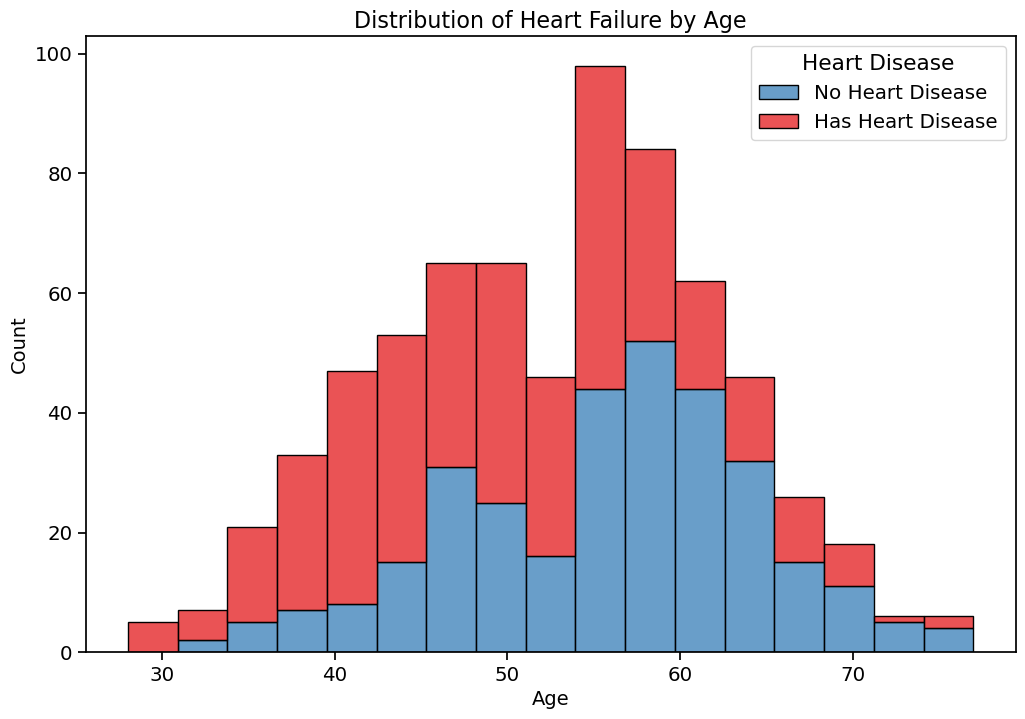

In [418]:
plt.figure(figsize=(12, 8))

# Create a stacked histogram using seaborn.histplot
sns.histplot(data=heart, x='Age', hue='HeartFailure', multiple='stack', palette='Set1')

# Set plot title and labels
plt.title('Distribution of Heart Failure by Age', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Show legend with appropriate labels
plt.legend(title='Heart Disease', labels=['No Heart Disease', 'Has Heart Disease'], loc='upper right')

# Display the plot
plt.show()

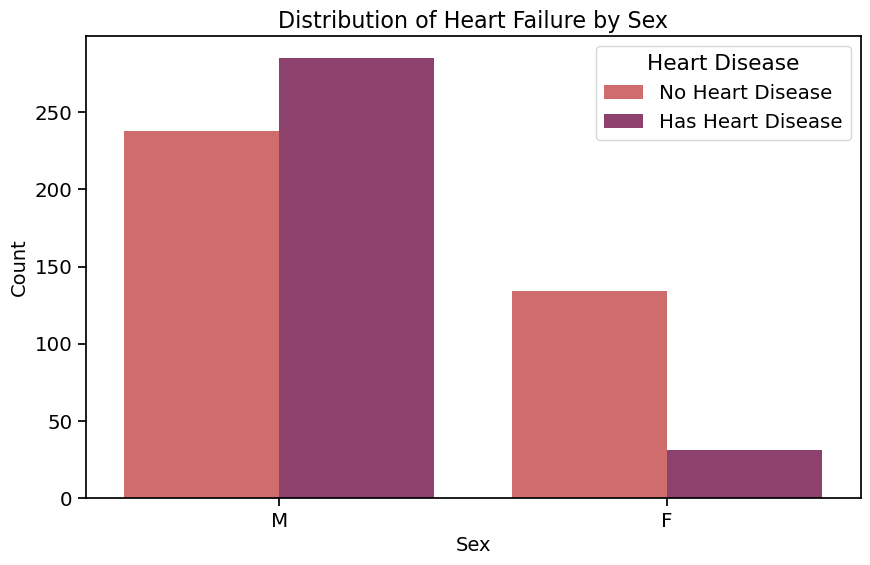

In [419]:
plt.figure(figsize=(10, 6))


# Create a countplot to visualize heart disease by sex
sns.countplot(x='Sex', hue='HeartFailure', data=heart, palette='flare')

# Set plot title and labels
plt.title('Distribution of Heart Failure by Sex', fontsize=16)
plt.xlabel('Sex', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Set legend labels
plt.legend(title='Heart Disease', labels=['No Heart Disease', 'Has Heart Disease'], loc='upper right')

# Show the plot
plt.show()


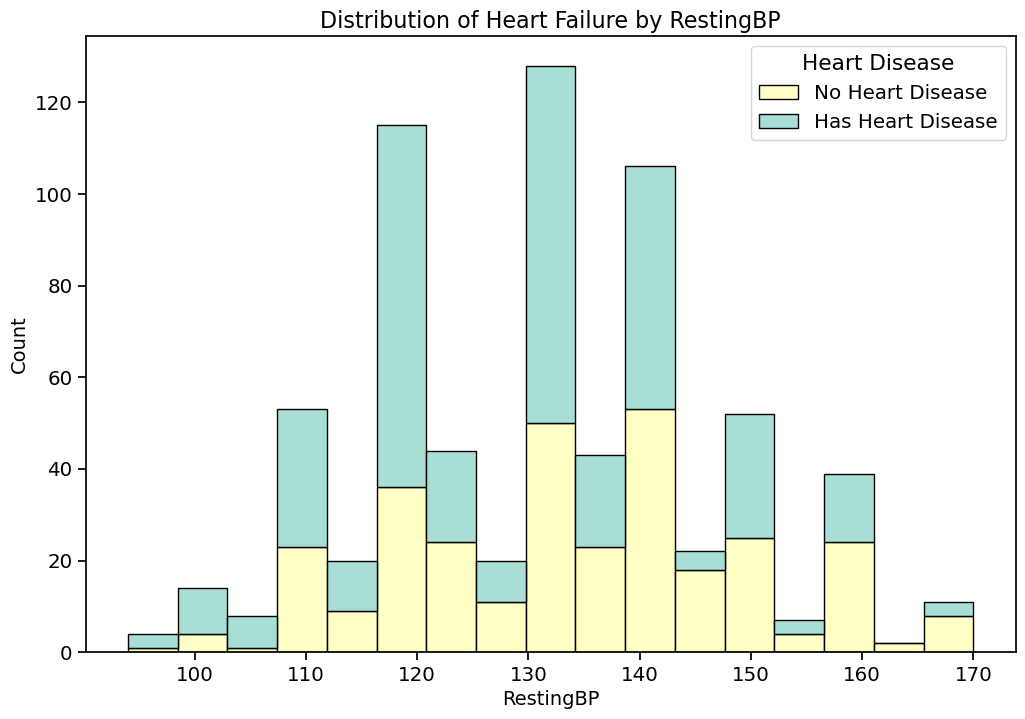

In [420]:
plt.figure(figsize=(12, 8))

# Create a stacked histogram using seaborn.histplot
sns.histplot(data=heart, x='RestingBP', hue='HeartFailure', multiple='stack', palette='Set3')

# Set plot title and labels
plt.title('Distribution of Heart Failure by RestingBP', fontsize=16)
plt.xlabel('RestingBP', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Show legend with appropriate labels
plt.legend(title='Heart Disease', labels=['No Heart Disease', 'Has Heart Disease'], loc='upper right')

# Display the plot
plt.show()

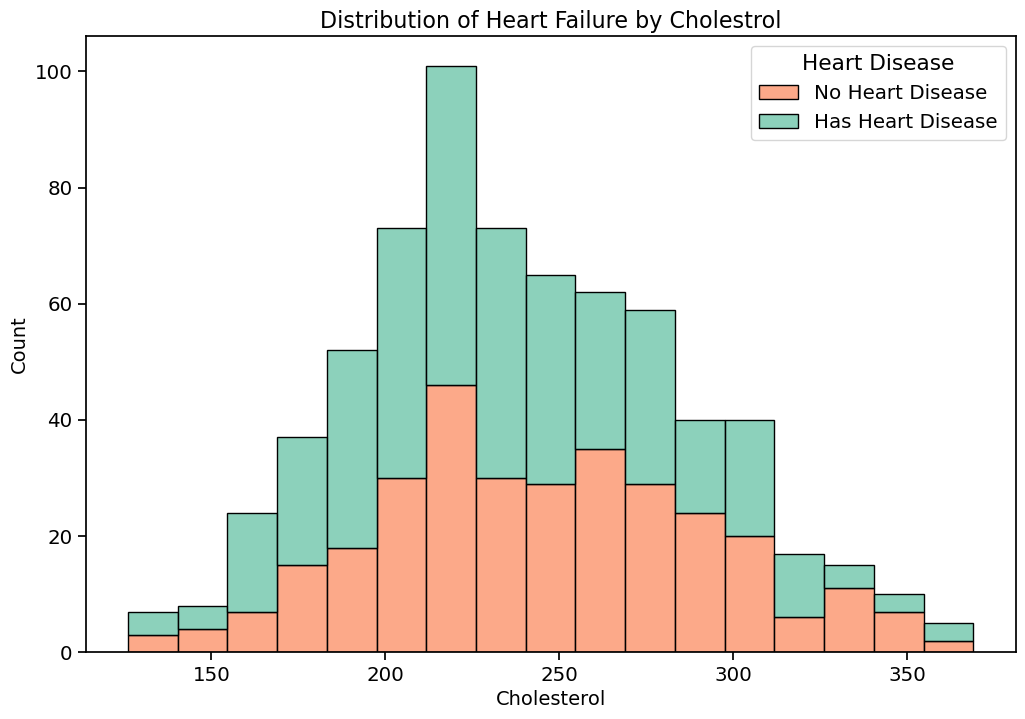

In [421]:
plt.figure(figsize=(12, 8))

# Create a stacked histogram using seaborn.histplot
sns.histplot(data=heart, x='Cholesterol', hue='HeartFailure', multiple='stack', palette='Set2')

# Set plot title and labels
plt.title('Distribution of Heart Failure by Cholestrol', fontsize=16)
plt.xlabel('Cholesterol', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Show legend with appropriate labels
plt.legend(title='Heart Disease', labels=['No Heart Disease', 'Has Heart Disease'], loc='upper right')

# Display the plot
plt.show()

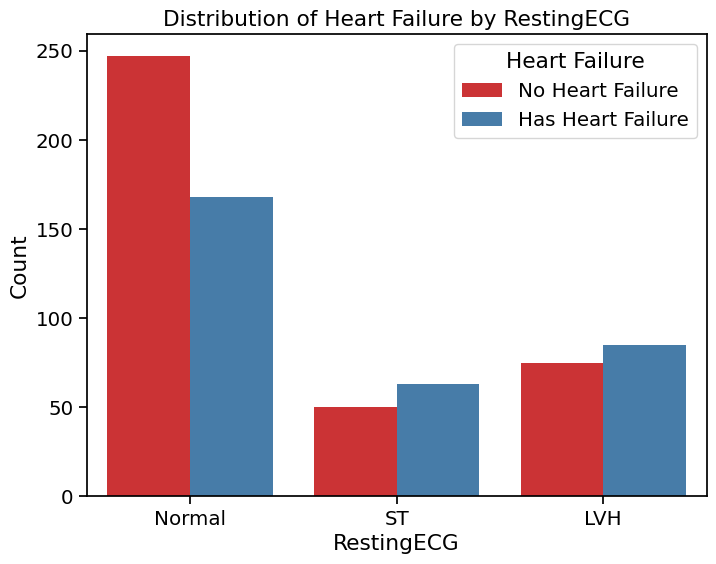

In [422]:
# Create a countplot to visualize ChestPainType vs. HeartFailure
plt.figure(figsize=(8, 6))
sns.countplot(x='RestingECG', hue='HeartFailure', data=heart, palette='Set1')
plt.title('Distribution of Heart Failure by RestingECG')
plt.ylabel('Count')
plt.legend(title='Heart Failure', loc='upper right')
plt.show()

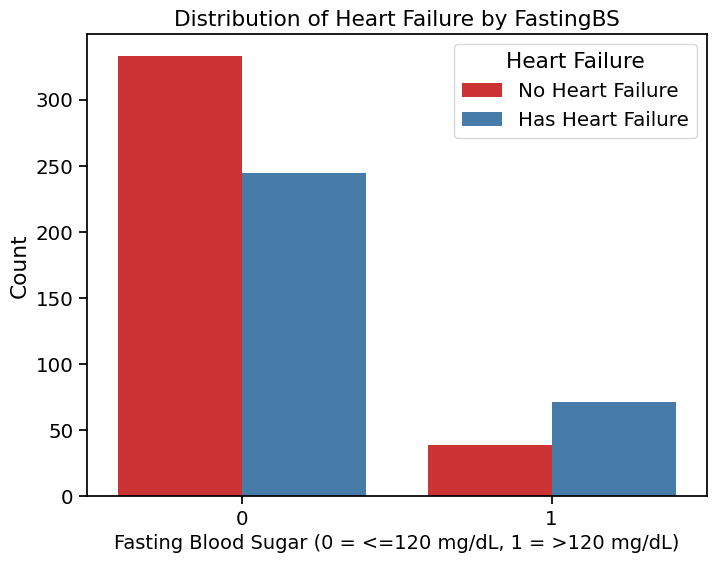

In [427]:
# Create a countplot to visualize ChestPainType vs. HeartFailure
plt.figure(figsize=(8, 6))
sns.countplot(x='FastingBS', hue='HeartFailure', data=heart, palette='Set1')
plt.title('Distribution of Heart Failure by FastingBS')
plt.xlabel('Fasting Blood Sugar (0 = <=120 mg/dL, 1 = >120 mg/dL)', fontsize=14)
plt.ylabel('Count')
plt.legend(title='Heart Failure', loc='upper right')
plt.show()

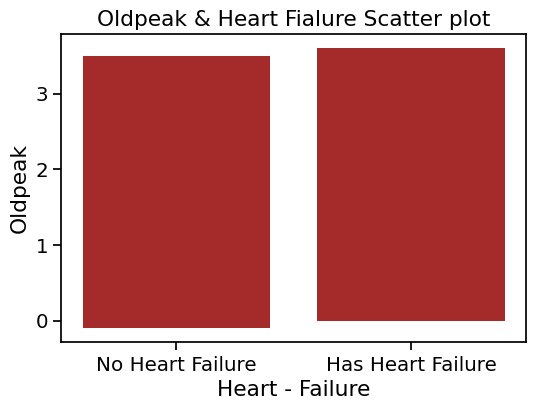

In [428]:
plt.figure(figsize=(6, 4))
plt.bar(heart["HeartFailure"], heart["Oldpeak"],color='brown')
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
plt.title('Oldpeak & Heart Fialure Scatter plot')
plt.xlabel('Heart - Failure')
plt.ylabel('Oldpeak')
plt.show()

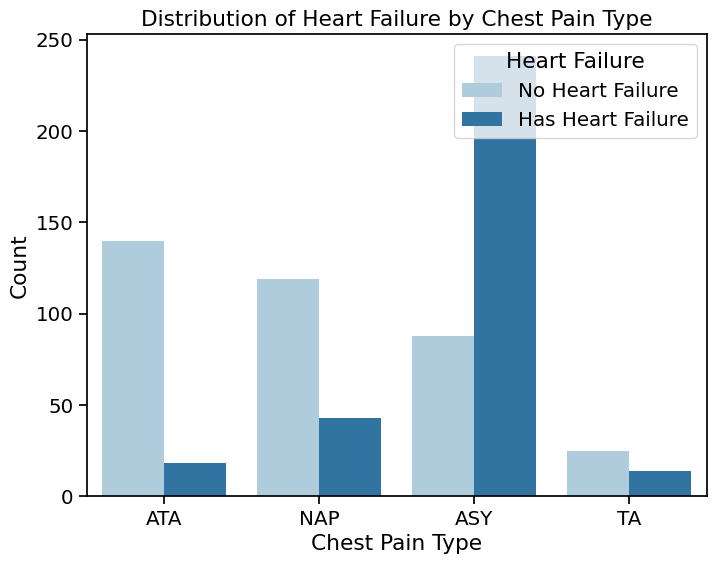

In [429]:
plt.figure(figsize=(8, 6))
sns.countplot(x='ChestPainType', hue='HeartFailure', data=heart, palette="Paired")
plt.title('Distribution of Heart Failure by Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(title='Heart Failure', loc='upper right')
plt.show()

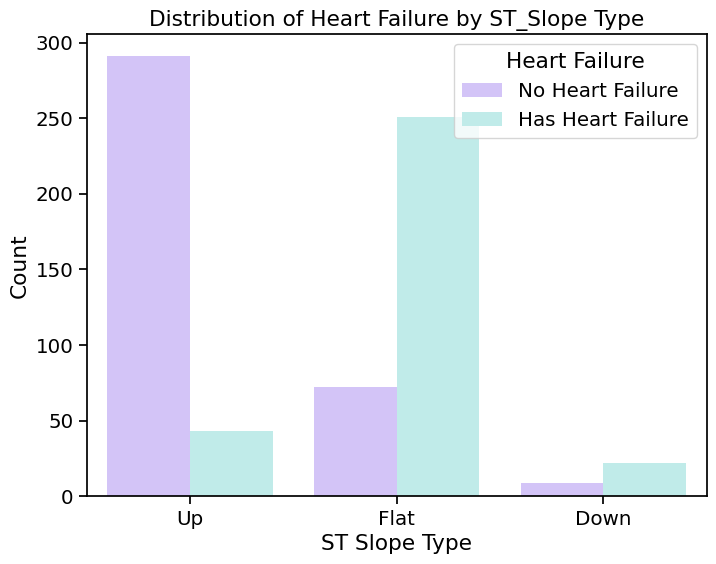

In [430]:
plt.figure(figsize=(8, 6))
sns.countplot(x='ST_Slope', hue='HeartFailure', data=heart, palette='blend:#d0bbff,#b9f2f0')
plt.title('Distribution of Heart Failure by ST_Slope Type')
plt.xlabel('ST Slope Type')
plt.ylabel('Count')
plt.legend(title='Heart Failure', loc='upper right')
plt.show()

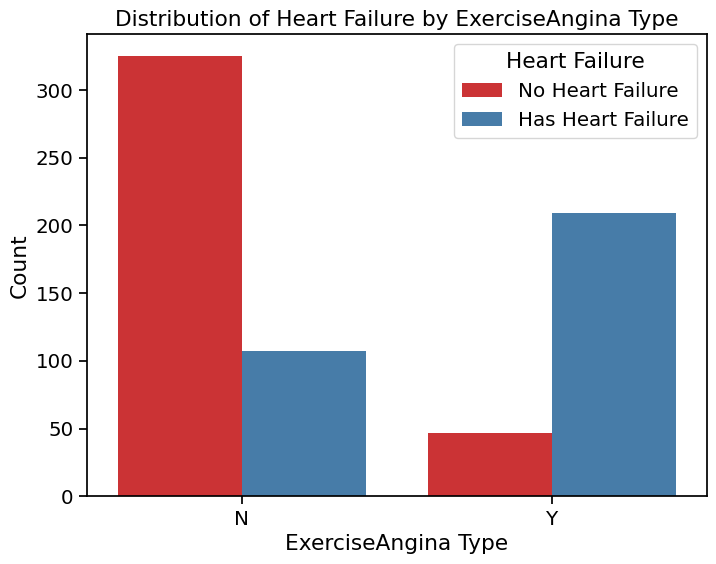

In [431]:
plt.figure(figsize=(8, 6))
sns.countplot(x='ExerciseAngina', hue='HeartFailure', data=heart, palette='Set1')
plt.title('Distribution of Heart Failure by ExerciseAngina Type')
plt.xlabel('ExerciseAngina Type')
plt.ylabel('Count')
plt.legend(title='Heart Failure', loc='upper right')
plt.show()

<Figure size 4800x600 with 0 Axes>

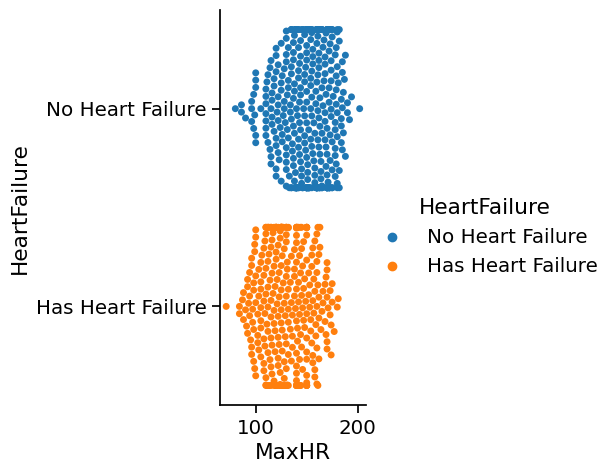

In [434]:
plt.figure(figsize=(48,6))
sns.catplot(data=heart, x="MaxHR", y="HeartFailure", hue="HeartFailure", kind="swarm")